In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
xs = np.random.randint(0, 99, 50)
ys = np.random.randint(0, 99, 50)

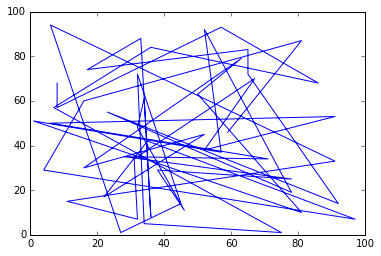

In [3]:
plt.plot(xs, ys)

In [4]:
def distance(a, b):
    d = 0
    s = len(a)
    for i in range(s):
        d += np.sqrt((a[i] - a[(i + 1) % s]) ** 2 + 
                     (b[i] - b[(i + 1) % s]) ** 2)
        
    return d

In [5]:
distance(xs, ys)

2633.3586854013884

In [6]:
def swap(i, j, a, b):
    t = a[i]
    a[i] = a[j]
    a[j] = t
    t = b[i]
    b[i] = b[j]
    b[j] = t

In [7]:
swap(4, 23, xs, ys)

In [8]:
distance(xs, ys)

2731.0645246531981

In [9]:
class Tour():
    
    def __init__(self, size):
        self.size = size
        self.xs = np.random.randint(0, 99, size)
        self.ys = np.random.randint(0, 99, size)
        
    def clone(self):
        c = Tour(self.size)
        c.xs = np.copy(self.xs)
        c.ys = np.copy(self.ys)
        return c
    
    def distance(self):
        d = 0
        s = len(self.xs)
        for i in range(s):
            d += np.sqrt((self.xs[i] - self.xs[(i + 1) % s]) ** 2 + 
                         (self.ys[i] - self.ys[(i + 1) % s]) ** 2)
        return d   
    
    def swap(self, i, j):
        t = self.xs[i]
        self.xs[i] = self.xs[j]
        self.xs[j] = t
        t = self.ys[i]
        self.ys[i] = self.ys[j]
        self.ys[j] = t      
        
    def plot(self):
        fig = plt.figure()
        ax = fig.add_subplot(111, aspect='equal')
        ax.set_xlim(0, 100)
        ax.set_ylim(0, 100)
        ax.plot(self.xs, self.ys)
        ax.scatter(self.xs, self.ys)

In [23]:
t = Tour(50)
t2 = t.clone()

In [24]:
def descent(tour):
    finished = False
    while not finished:
        d = tour.distance()
        best_d = d
        best_i = -1
        best_j = -1
        s = tour.size
        finished = True
        for i in range(s):
            for j in range(i + 1, s):
                tour.swap(i, j)
                od = tour.distance()
                if od < best_d:
                    finished = False
                    best_d = od
                    best_i = i
                    best_j = j
                tour.swap(i, j)
        if not finished:
            tour.swap(best_i, best_j)
            print(tour.distance())

In [25]:
descent(t)

2658.87121202
2450.7525058
2244.76414749
2111.22020347
2025.19743484
1946.18289085
1871.79093266
1797.94810673
1734.65279126
1659.59336828
1603.4205639
1540.84104502
1487.35174759
1436.73018519
1391.3409781
1358.27547253
1334.03809892
1310.1726585
1291.61175277
1273.5732895
1258.36652106
1243.47261159
1220.94455386
1209.33696151
1200.56932376
1192.61902453
1168.04689442
1141.6628594
1122.0092921
1113.8666466
1106.56025194
1101.13637898
1096.8361353
1092.82728799
1054.84334478
1053.67063739
1052.66743657
1051.33261844
1049.68759103
1048.7025975
1047.36285971


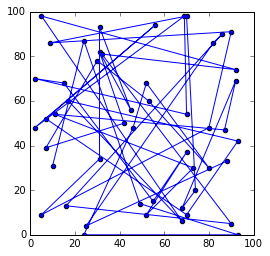

In [26]:
t2.plot()

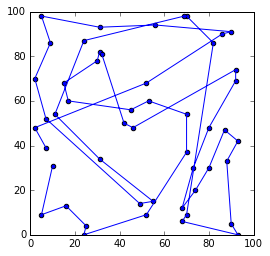

In [27]:
t.plot()

In [19]:
t2.distance()

2624.3541820727301

In [20]:
t.distance()

858.49570373709616

In [36]:
def annealing(t, temp, decay, stop):
    while temp > stop:
        bd = t.distance()
        i, j = np.random.randint(0, t.size, 2)
        t.swap(i, j)
        nd = t.distance()
        delta = nd - bd
        if delta >= 0:
            p = np.exp(-delta / temp)
            if np.random.random() > p:
                t.swap(i, j)
        temp *= decay

In [37]:
t3 = t2.clone()

In [38]:
annealing(t3, 5000, 0.999, 0.00001)

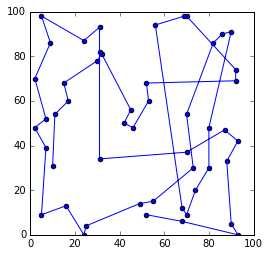

In [39]:
t3.plot()

In [35]:
t3.distance()

712.47058754249872